In [2]:
from IPython.display import HTML
import warnings
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [3]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("C:\\Users\\hp\\Desktop\\AI\\Event Challenges\\Facebook Academy\\Facebook Analytics Academy\\receiver_data.csv")
#print(ds)
df.head()

,Unnamed: 0,message_id,user_id_receiver,datetime_received,datetime_opened,receiver_carrier,receiver_device_type,receiver_device_os,receiver_device_make
0,1,147420,100092256234,2017-12-24 11:09:47,2017-12-24 11:09:49,O2 / Telefonica,tablet,iOS,iPad
1,2,123567,100092256234,2017-12-24 05:25:10,2017-12-24 05:25:13,Verizon,mobile,Android,Motorola
2,3,103163,100092256234,2017-12-24 00:35:46,2017-12-24 00:35:47,O2 / Telefonica,mobile,Android,OnePlus
3,4,144538,100092256234,2017-12-24 10:29:00,2017-12-24 10:39:00,Verizon,mobile,Android,OnePlus
4,5,107753,100092256234,2017-12-24 01:40:51,2017-12-24 01:42:51,AT&T,mobile,Android,Motorola


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,message_id,user_id_receiver,datetime_received,datetime_opened,receiver_carrier,receiver_device_type,receiver_device_os,receiver_device_make
0,147420,100092256234,2017-12-24 11:09:47,2017-12-24 11:09:49,O2 / Telefonica,tablet,iOS,iPad
1,123567,100092256234,2017-12-24 05:25:10,2017-12-24 05:25:13,Verizon,mobile,Android,Motorola
2,103163,100092256234,2017-12-24 00:35:46,2017-12-24 00:35:47,O2 / Telefonica,mobile,Android,OnePlus
3,144538,100092256234,2017-12-24 10:29:00,2017-12-24 10:39:00,Verizon,mobile,Android,OnePlus
4,107753,100092256234,2017-12-24 01:40:51,2017-12-24 01:42:51,AT&T,mobile,Android,Motorola


In [6]:
df.shape

(423852, 8)

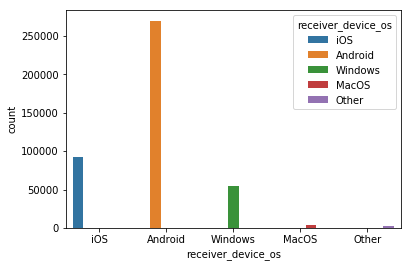

In [8]:
sns.countplot(x = 'receiver_device_os',data = df,hue = 'receiver_device_os')

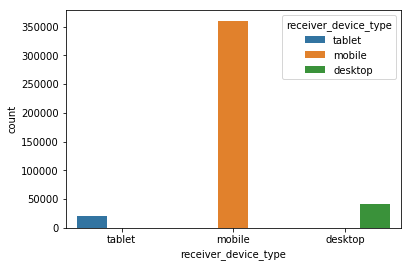

In [9]:
sns.countplot(x = 'receiver_device_type',data = df,hue = 'receiver_device_type')

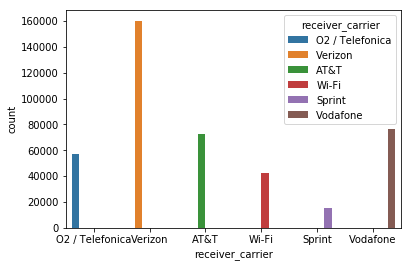

In [10]:
sns.countplot(x = 'receiver_carrier',data = df,hue = 'receiver_carrier')

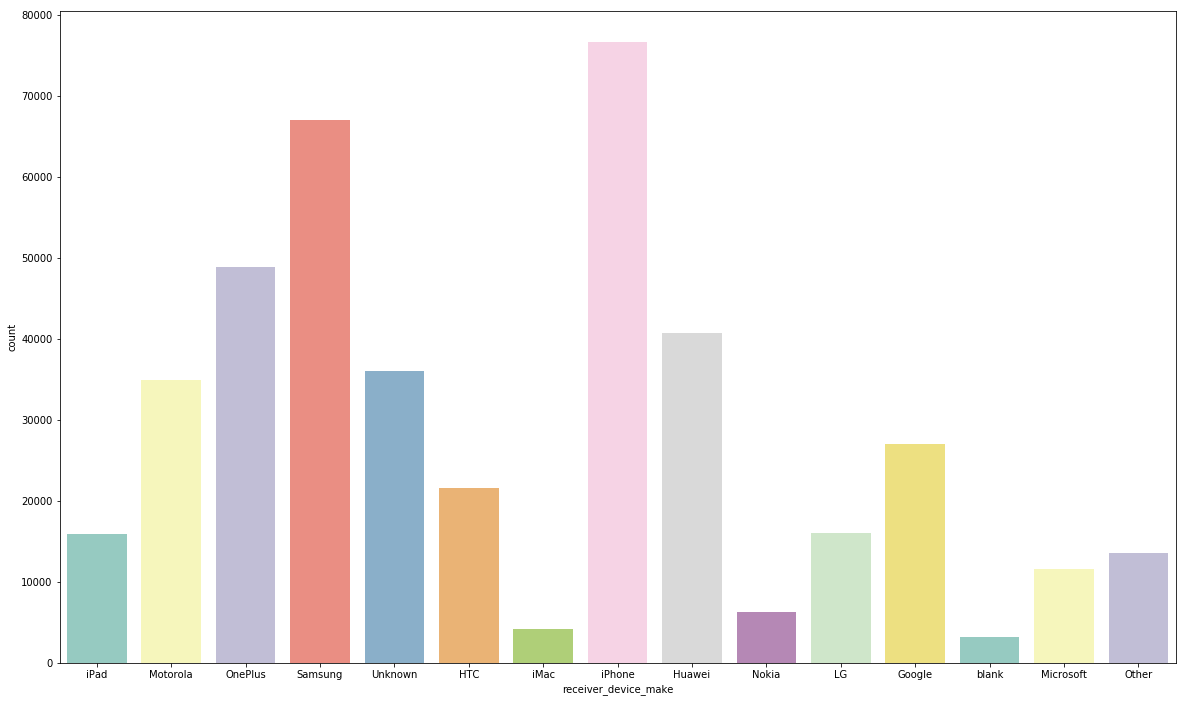

In [86]:
plt.figure(figsize = (20,12))
sns.countplot(x = 'receiver_device_make',data = df,palette="Set3")

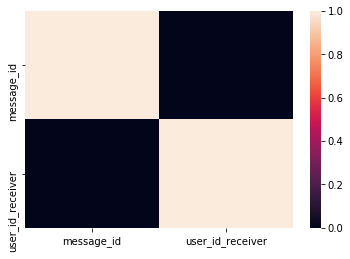

In [12]:
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [9]:
# Calculating date/time difference between two columns using the pandas datetime support (time difference in minutes)
df['time difference'] = ((pd.to_datetime(df['datetime_opened']) - 
                            pd.to_datetime(df['datetime_received']))
                                .dt.total_seconds() / 60)
print(df['time difference'])

0          0.033333
1          0.050000
2          0.016667
3         10.000000
4          2.000000
5         10.000000
6          0.033333
7          0.050000
8          0.083333
9          0.500000
10         0.033333
11         0.050000
12         0.033333
13         0.083333
14        10.000000
15         0.016667
16         0.033333
17        10.000000
18         0.166667
19        10.000000
20         5.000000
21         5.000000
22         0.016667
23        10.000000
24         0.050000
25        60.000000
26        10.000000
27         2.000000
28        60.000000
29         0.050000
            ...    
423822    60.000000
423823    60.000000
423824     0.033333
423825    60.000000
423826     2.000000
423827    10.000000
423828     0.033333
423829     5.000000
423830     2.000000
423831     0.033333
423832     0.033333
423833     0.166667
423834    10.000000
423835     0.033333
423836     5.000000
423837     0.166667
423838     0.050000
423839    10.000000
423840    60.000000


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean number of time an user takes to open a received message (in minutes) 11.095532166864736


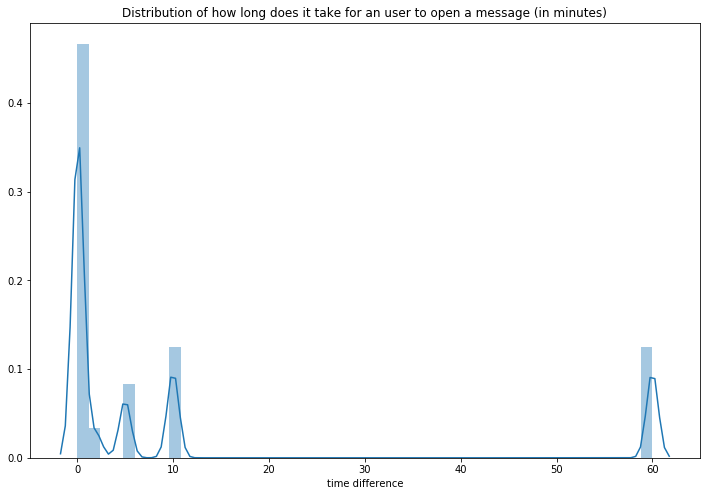

In [10]:
plt.figure(figsize = (12,8))
sns.distplot(df['time difference'])
plt.title("Distribution of how long does it take for an user to open a message (in minutes)")
print("Mean number of time an user takes to open a received message (in minutes)",np.mean(df['time difference']))

In [11]:
# Calculating date/time difference between two columns using the pandas datetime support (time difference in seconds)
df['time difference s'] = ((pd.to_datetime(df['datetime_opened']) - 
                            pd.to_datetime(df['datetime_received']))
                                .dt.total_seconds())
print(df['time difference s'])

0            2.0
1            3.0
2            1.0
3          600.0
4          120.0
5          600.0
6            2.0
7            3.0
8            5.0
9           30.0
10           2.0
11           3.0
12           2.0
13           5.0
14         600.0
15           1.0
16           2.0
17         600.0
18          10.0
19         600.0
20         300.0
21         300.0
22           1.0
23         600.0
24           3.0
25        3600.0
26         600.0
27         120.0
28        3600.0
29           3.0
           ...  
423822    3600.0
423823    3600.0
423824       2.0
423825    3600.0
423826     120.0
423827     600.0
423828       2.0
423829     300.0
423830     120.0
423831       2.0
423832       2.0
423833      10.0
423834     600.0
423835       2.0
423836     300.0
423837      10.0
423838       3.0
423839     600.0
423840    3600.0
423841       5.0
423842       3.0
423843       3.0
423844    3600.0
423845      10.0
423846    3600.0
423847       1.0
423848       1.0
423849       2

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Mean number of time an user takes to open a received message (in seconds) 665.7319300133065


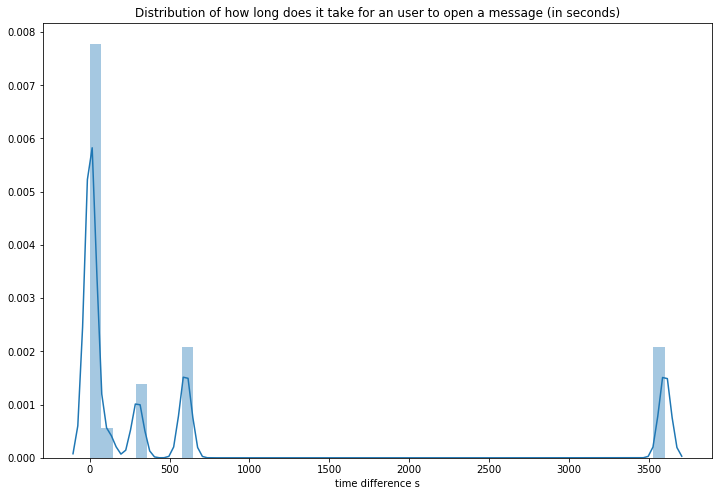

In [13]:
plt.figure(figsize = (12,8))
sns.distplot(df['time difference s'])
plt.title("Distribution of how long does it take for an user to open a message (in seconds)")
print("Mean number of time an user takes to open a received message (in seconds)",np.mean(df['time difference s']))

In [85]:
# Creating a dataframe called dfsorted containing the columns I am interested in and then sort the timedifference column in 
# descending order. The user_id_receiver rows also change order to be correclty paired with their time difference correspective
dfsorted = df[['user_id_receiver', 'time difference']]
dfsorted = dfsorted.sort_values('time difference', ascending=False)

In [76]:
# Checking how many duplicates there are in time difference
import numpy as np
x = np.array(df['time difference'].values.astype('int64'))
y = np.bincount(x)
ii = np.nonzero(y)[0]

In [77]:
# In the array, the first number is the number in time difference and the second number is the number of duplicates presents
# in timedifference of the first number
r= np.vstack((ii,y[ii])).T
print(r)

[[     0 237409]
 [     2  17121]
 [     5  42407]
 [    10  63574]
 [    60  63341]]


In [79]:
# Checking our sorted dataframe
dfsorted[['user_id_receiver', 'time difference']].head(63343)

,user_id_receiver,time difference
137964,121571932788,60.0
126335,968598345638,60.0
356161,790685877584,60.0
126364,96878256840,60.0
126362,96878256840,60.0
126361,96878256840,60.0
356164,790685877584,60.0
356166,790685877584,60.0
356170,790685877584,60.0
126344,968708308668,60.0


Text(0,0.5,'User ID')

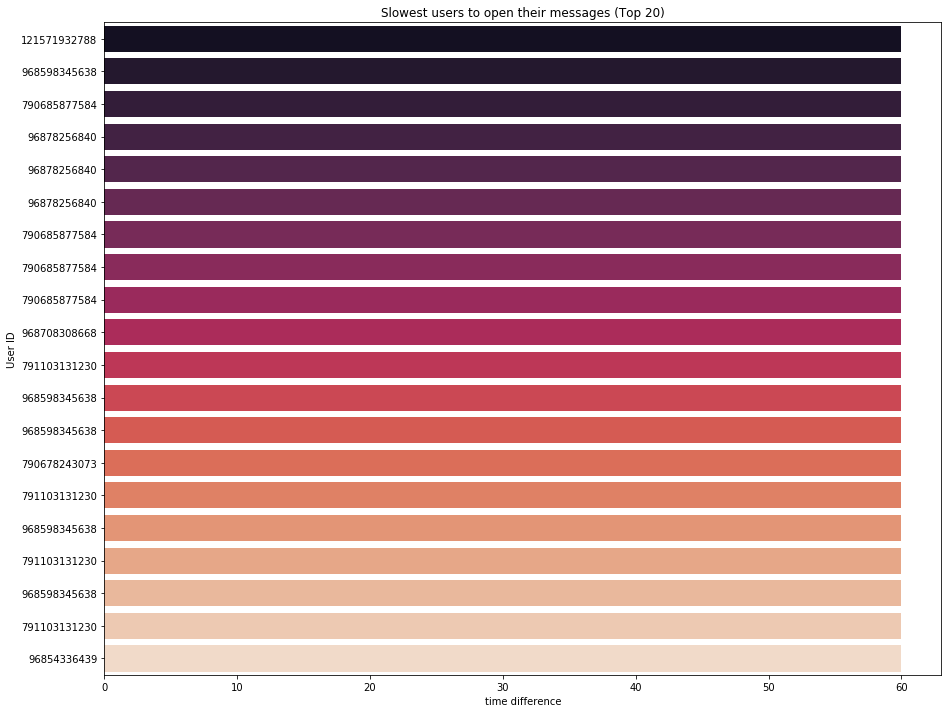

In [81]:
plt.figure(figsize = (15,12))
y_pos = np.arange(len(dfsorted['user_id_receiver'][0:20]))
sns.barplot(y =y_pos, x=dfsorted['time difference'][0:20], palette = 'rocket', orient = 'h')
plt.title("Slowest users to open their messages (Top 20)")
plt.yticks(y_pos, dfsorted['user_id_receiver'][0:20])
plt.ylabel('User ID')

Text(0,0.5,'User ID')

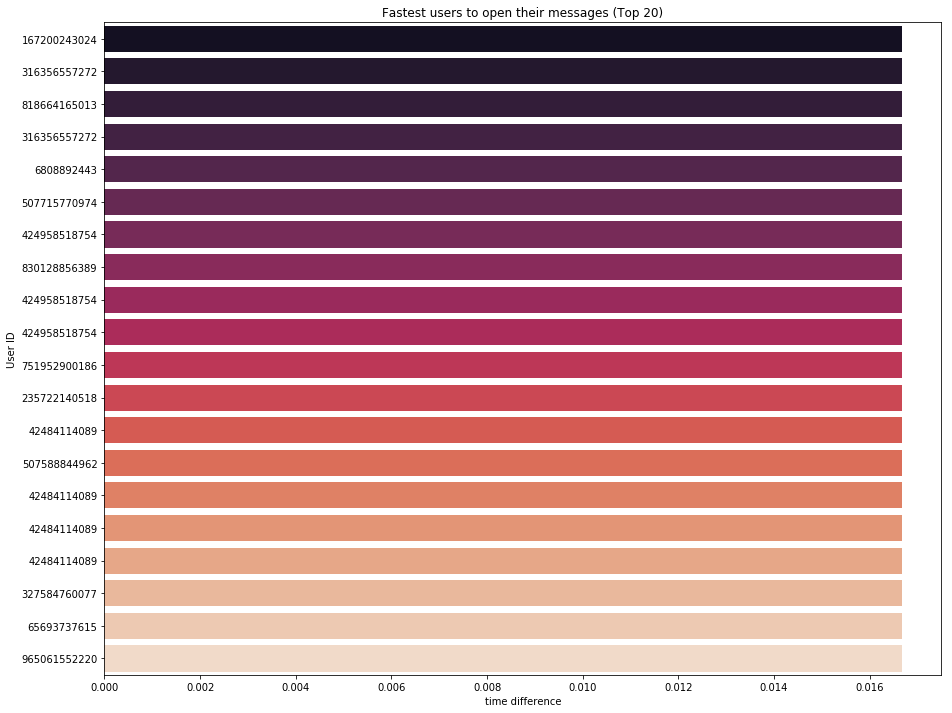

In [84]:
plt.figure(figsize = (15,12))
y_pos = np.arange(len(dfsorted['user_id_receiver'].tail(20)))
sns.barplot(y =y_pos, x=dfsorted['time difference'].tail(20), palette = 'rocket', orient = 'h')
plt.title("Fastest users to open their messages (Top 20)")
plt.yticks(y_pos, dfsorted['user_id_receiver'].tail(20))
plt.ylabel('User ID')